# Content

## 1. Sales
1.1 [EDA](https://colab.research.google.com/drive/1io5VNWHmiDmn_rg9bKa1j0H6LqDNS4NR)  
1.2 [SPC](https://colab.research.google.com/drive/1PbqfbITrbjdQzJAGWF3PSCasTG7g7Wzy#scrollTo=3ON5yj9YfXxk)  
1.3 [FC](https://colab.research.google.com/drive/1hu78fzV_VS4bXGMnkidhgh9fPP1kFGWl#scrollTo=PeJZJm4YYtJ5)  
1.4 [Feature Engineering and RFM](https://colab.research.google.com/drive/1h28pnMQc8uKE8WTVBPwbWj7R1Tv3dx34)  
1.5 [Dashboard](https://colab.research.google.com/drive/1p8vbCfD991t8-4srvKDEm7souyviOzcQ#scrollTo=RCYNS8i8h4sa)  
1.6 [Market Basket](https://colab.research.google.com/drive/1iTeN6MO9LOQSy5rBdypyqJXe3nZX8DxR)  
1.7 [Collaborative Filtering](https://colab.research.google.com/drive/1JoeBe9Lz-47EhuuJ8FRRArUSxjOH0-Xd)  
1.8 [Hybrid Recommender](https://colab.research.google.com/drive/1urcbHXMQKsSpFjGUk8pj5AHgC076zM4d)  
1.9 Churn Prediction

# Empfehlungssysteme mit Collaborative Filtering: Muster im Nutzer- und Produktverhalten

Collaborative Filtering: Empfehlungen aus Kunden- und Artikelinteraktionen
Nachdem wir in der Warenkorbanalyse entdeckt haben, welche Produkte häufig gemeinsam gekauft werden, gehen wir nun einen Schritt weiter: Wir wollen nicht nur Produktkombinationen verstehen, sondern gezielt für jeden einzelnen Kunden passende Empfehlungen generieren.

Das Verfahren, das dabei im Mittelpunkt steht, nennt sich Collaborative Filtering. Die Grundidee: Nutzer mit ähnlichem Verhalten neigen dazu, ähnliche Produkte zu mögen – und Artikel, die oft gemeinsam von ähnlichen Nutzern konsumiert werden, sind potenzielle Empfehlungen.



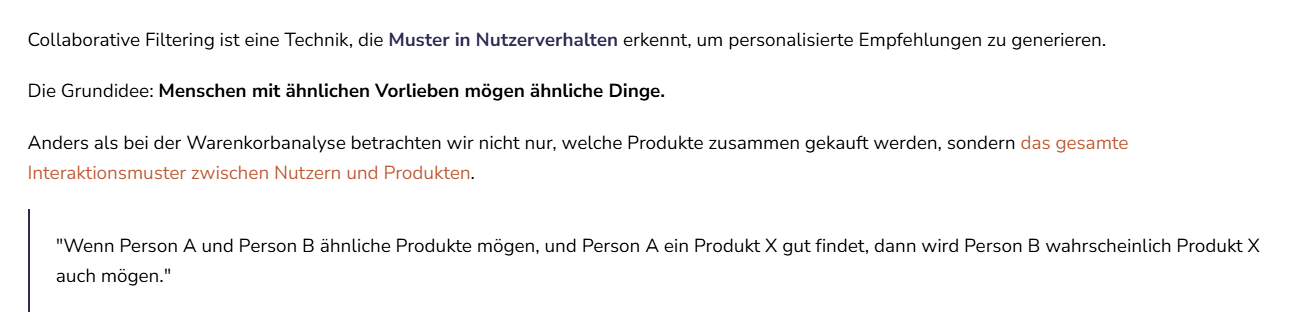

Warum Collaborative Filtering entscheidend ist
Dieses Verfahren ist ein Kernbaustein moderner Empfehlungssysteme, wie sie von Amazon, Netflix oder Spotify genutzt werden. Es bietet:

Personalisierte Empfehlungen, die über generische Bestseller-Listen hinausgehen

Lernfähigkeit, da neue Interaktionen das System kontinuierlich verbessern

Skalierbarkeit, von kleinen Produktsortimenten bis zu Millionen von Artikeln

Anpassungsfähigkeit an verschiedene Datentypen – von Käufen über Bewertungen bis zu Klickverhalten



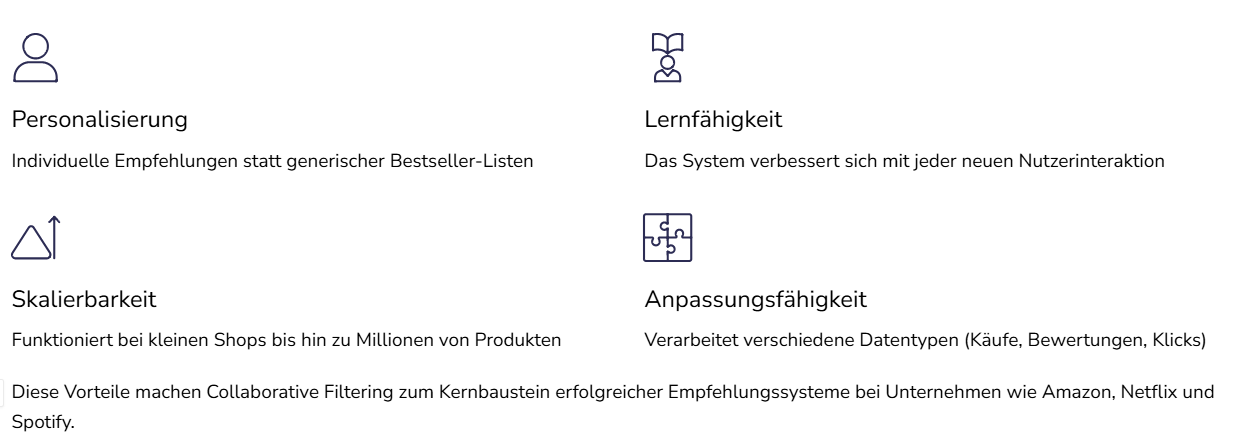

Im Unterschied zur Market-Basket-Analyse betrachtet Collaborative Filtering nicht nur den Inhalt der Artikel, sondern vor allem die Muster in den Interaktionen zwischen Nutzern und Artikeln.

Methoden im Überblick
Es gibt zwei Hauptvarianten:

User-based Collaborative Filtering – „Kunden, die wie du einkaufen, haben auch gekauft …“

Item-based Collaborative Filtering – „Artikel, die diesem ähnlich sind, wurden auch gekauft …“

Beide Varianten stützen sich auf Ähnlichkeitsmaße (z. B. Cosine Similarity, Korrelation), um Verbindungen herzustellen. In erweiterten Verfahren kommen Matrixfaktorisierungen wie SVD (Singular Value Decomposition) oder ALS (Alternating Least Squares) zum Einsatz, um auch in großen, dünn besetzten Datensätzen (Sparse Data) Empfehlungen abzuleiten.



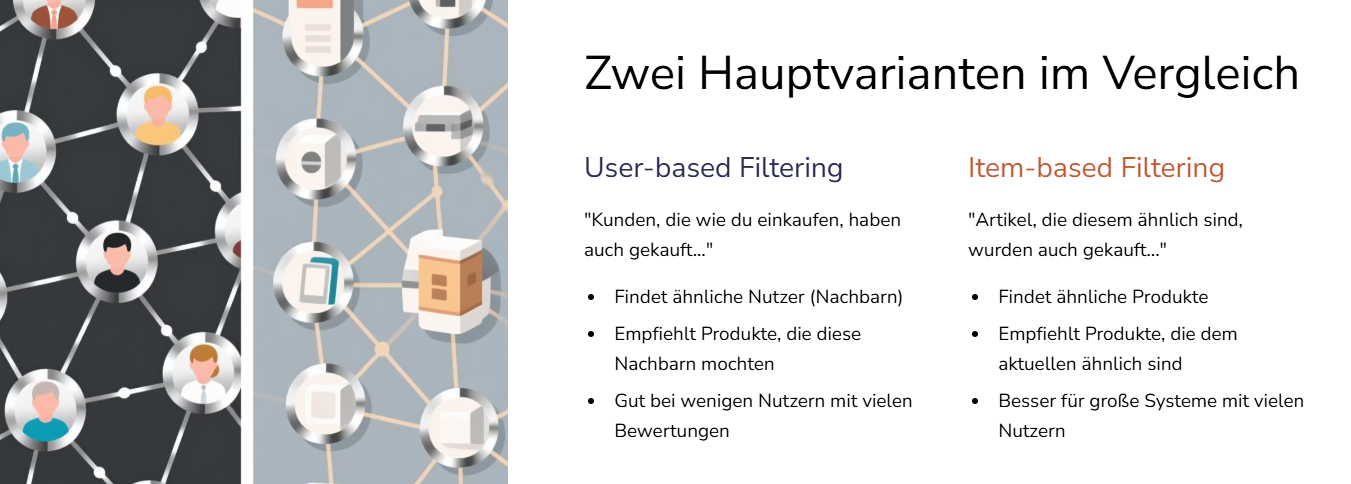

Der Ausgangspunkt für Collaborative Filtering ist eine Matrix mit Bewertungen oder Interaktionen:

- Jede Zeile repräsentiert einen Nutzer

- Jede Spalte repräsentiert ein Produkt

- Die Werte zeigen Interaktionen (z.B. Bewertungen von 1-5 Sternen)

- Viele leere Zellen (Sparse Matrix) - die meisten Nutzer bewerten nur wenige Produkte

Diese Matrix ist der Schlüssel zum Verständnis der Ähnlichkeiten zwischen Nutzern oder Produkten.

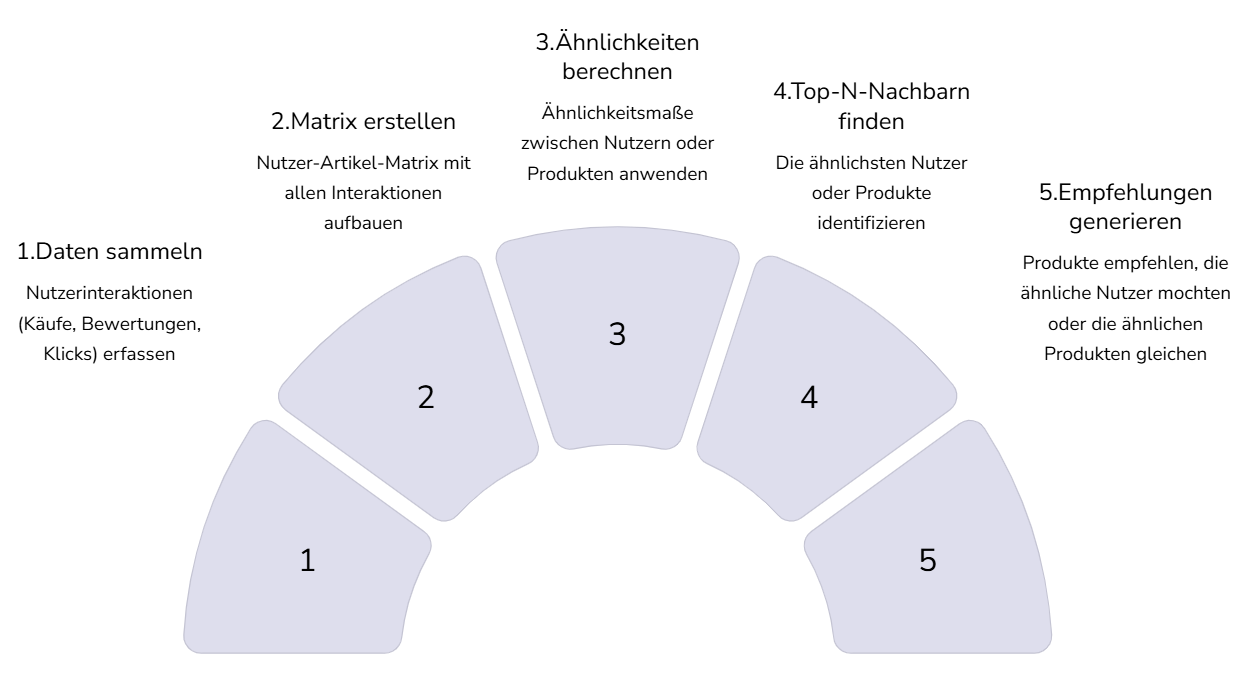

# Reading in the Data

In [ ]:
import pandas as pd
data = pd.read_excel("https://github.com/DAR-DatenanalyseRehberg/DDDD_Data-Driven-Dealings-Development/raw/main/DDDD.xlsx")
data

,SalesDate,SalesValue,SalesAmount,Customer,SalesTransactionID,SalesItem
0,2018-09-28,8280.00,10,0,0,0
1,2018-09-28,7452.00,10,0,0,0
2,2019-04-23,21114.00,30,0,1,0
3,2019-04-23,7038.00,10,0,1,1
4,2019-04-23,7000.00,2,0,1,2
...,...,...,...,...,...,...
341417,2016-06-20,72.00,3,25,49674,1212
341418,2016-06-20,48.00,2,25,49675,1481
341419,2016-07-04,5.30,2,25,49676,628
341420,2016-06-20,48.78,1,25,49677,1046


# Sparsity

Die **Datenlücke oder Dünnheit** in der Interaktionsmatrix zwischen Nutzern und Artikeln ist ein häufiges und großes Problem bei der Entwicklung von Empfehlungssystemen.

Sparsity tritt auf, wenn die meisten Zellen in der **User-Item-Matrix** leer sind. Eine solche Matrix bildet ab, wie Nutzer mit Elementen  interagiert haben.
* **Zeilen:** Stellen die Nutzer dar.
* **Spalten:** Stellen die Elemente dar.
* **Werte:** Repräsentieren Interaktionen (z.B.  Käufe).



In der Praxis hat ein Käufer in der Regel nur einen winzigen Bruchteil aller verfügbaren Artikel gekauft. Dies führt dazu, dass die meisten Zellen in der Matrix den Wert `0` oder `NaN` haben. Die Matrix ist also **"dünn"** besiedelt.

### Warum ist Sparsity ein Problem?

* **Schwierigkeit beim Lernen:** Viele kollaborative Filteralgorithmen basieren auf dem Vergleich von Nutzerpräferenzen. Wenn kaum gemeinsame Interaktionen vorhanden sind, wird es schwierig, sinnvolle Ähnlichkeiten zwischen Nutzern oder Elementen zu finden.
* **Modellgenauigkeit:** Die Sparsity kann die Genauigkeit der Vorhersagen erheblich beeinträchtigen, da das Modell kaum Daten hat, um fundierte Entscheidungen zu treffen.
* **Skalierbarkeit:** Das Speichern und Verarbeiten solch großer, leerer Matrizen ist rechenintensiv und ineffizient.



In [ ]:
DataPrep = data[['SalesItem', 'SalesAmount', 'Customer']] #we will only use SalesItem, SalesAmount and Customer for our recommending purpose
DataPrep.head()

,SalesItem,SalesAmount,Customer
0,0,10,0
1,0,10,0
2,0,30,0
3,1,10,0
4,2,2,0


In [ ]:
DataPrep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341422 entries, 0 to 341421
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   SalesItem    341422 non-null  int64
 1   SalesAmount  341422 non-null  int64
 2   Customer     341422 non-null  int64
dtypes: int64(3)
memory usage: 7.8 MB


In [ ]:
DataGrouped = DataPrep.groupby(['Customer', 'SalesItem']).sum().reset_index() # Group together
DataGrouped.head()



,Customer,SalesItem,SalesAmount
0,0,0,281
1,0,1,158
2,0,2,13
3,0,768,1
4,1,3,2


In [ ]:
#make sure that no values <=0 exist
DataGroupedZero = DataGrouped.query('SalesAmount <= 0')
DataGroupedZero.head()

,Customer,SalesItem,SalesAmount


In [ ]:
#in our above check we have made sure that no datarows <=0 exists. That is fine!
#only use this in case your data includes values <=0
# DataGrouped.SalesAmount.loc[DataGrouped.SalesAmount == 0] = 1 # Replace a sum of zero purchases with a one to
# DataGrouped.head()

#another interesting way to achieve the same is to use query function
#DataGrouped = DataGrouped.query('SalesAmount > 0') # Only get customers where purchase totals were positive
#DataGrouped.head()


In [ ]:
import numpy as np
customers = list(np.sort(DataGrouped.Customer.unique())) # why 36 unique customers in a list and not 35? Index starts at 0!
products = list(DataGrouped.SalesItem.unique()) # Get our unique 3725 unique products that were purchased
quantity = list(DataGrouped.SalesAmount) # All of our purchases
#list function is a list of values. So customers now stores 36 unique customers.

In [ ]:
from pandas import DataFrame
DfCustomerUnique = DataFrame(customers,columns=['Customer'])
DfCustomerUnique.head()

,Customer
0,0
1,1
2,2
3,3
4,4




Eine `csr_matrix` ist eine **spezifische Datenstruktur**, die zur effizienten Speicherung und Verarbeitung von **sehr dünnbesetzten (sparse) Matrizen** dient. Sie begegnet der "Sparsity" (Dünnbesetztheit) indem sie nur die **nicht-null-Werte** und deren Indizes speichert. Dies spart enorm viel Speicherplatz und Rechenzeit im Vergleich zu einer vollen (dichten) Matrix, bei der auch alle Null-Werte gespeichert werden müssen.



In [ ]:
from scipy import sparse
from pandas.api.types import CategoricalDtype

rows = DataGrouped.Customer.astype(CategoricalDtype(categories=customers)).cat.codes # We have got 36 unique customers, which make up 13837 data rows (index)

# Get the associated row indices
cols = DataGrouped.SalesItem.astype(CategoricalDtype(categories= products)).cat.codes # We have got unique 3725 SalesItems, making up 13837 data rows (index)

# Get the associated column indices
#Compressed Sparse Row matrix
PurchaseSparse = sparse.csr_matrix((quantity, (rows, cols)), shape=(len(customers), len(products))) #len of customers=35, len of products=3725
#csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
#where data, row_ind and col_ind satisfy the relationship a[row_ind[k], col_ind[k]] = data[k]. , see https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html

PurchaseSparse
#a sparse matrix is not a pandas dataframe, but sparse matrices are efficient for row slicing and fast matrix vector products


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 13837 stored elements and shape (35, 3725)>

# Aufgabe: Was wäre, wenn wir nicht csr_matrix verwenden würden?

In [ ]:
# Geben Sie hier Ihre Gedanken ein...













Wenn wir nicht die `csr_matrix` verwenden würden, müssten wir eine **dense** (dichte) Matrix erstellen, zum Beispiel mit NumPy.  Eine dichte Matrix würde alle möglichen Kombinationen von Kunden und Produkten als Einträge speichern, selbst wenn die meisten davon den Wert Null haben.

---

### Was passiert, wenn man eine dichte Matrix verwendet?

Statt die Verkäufe in einem schlanken Format zu speichern, das nur die tatsächlichen Käufe (nicht-Null-Werte) enthält, würden wir eine Matrix der Größe $36 \times 3725$ erstellen. Das ergibt $36 \times 3725 = 134.100$ Zellen, von denen die meisten den Wert Null hätten, da die meisten Kunden nicht alle der 3725 Produkte gekauft haben.

* **Speicherverbrauch:** Eine dichte Matrix würde den gesamten Speicher für diese 134.100 Zellen reservieren, auch wenn nur ein kleiner Bruchteil davon genutzt wird. Die **CSR-Matrix** (`csr_matrix`) hingegen speichert nur die nicht-Null-Werte und deren Positionen, was extrem **speichereffizient** ist, insbesondere bei großen, dünn besetzten Datensätzen.

* **Rechenleistung:** Operationen auf einer dichten Matrix, wie z.B. Matrix-Multiplikationen, würden alle 134.100 Zellen durchlaufen, auch die vielen Nullen. Die `csr_matrix` ist **für schnelle Zeilen-Slicing und Matrix-Vektor-Produkte optimiert** und führt Berechnungen nur auf den relevanten, nicht-Null-Werten aus, was die Rechenzeit erheblich verkürzt.


In [ ]:
#We have 35 customers with 3725 items. For these user/item interactions, 13837 of these items had a purchase.
#In terms of sparsity of the matrix, that makes:
MatrixSize = PurchaseSparse.shape[0]*PurchaseSparse.shape[1] # 130375 possible interactions in the matrix (35 unique customers * 3725 unique SalesItems=130375)
PurchaseAmount = len(PurchaseSparse.nonzero()[0]) # 13837 SalesItems interacted with;
sparsity = 100*(1 - (PurchaseAmount/MatrixSize))
sparsity


89.38676893576223

Da wir kollaboratives Filtern verwenden, sollte es kein Problem sein, dass 89,3 % der Interaktionsmatrix dünn besetzt (sparse) sind. Das bedeutet, dass in unserem Fall nur 10,7 % unserer Kunden-Artikel-Interaktionen ausgefüllt sind, was darauf hindeutet, dass die meisten Artikel von Kunden noch nicht gekauft wurden. Kollaboratives Filtern kann sogar mit noch dünneren Daten gut funktionieren.

# Recommending

In [ ]:
#for every dataset we will add a 1 as purchased. That means, that this customer has purchased this item, no matter how many. We use this binary data for our recommending. Another approach would be to use the SalesAmount and
#normalize it, in case you want to treat the Amount of SalesItems purchased as a kind of taste factor, meaning that someone who bought SalesItem x 100 times, while another Customer bought that same SalesItem x only 5 times does
#not like it as much. I believe, that very often in Sales a binary approach makes more sense, but of course that depends on the data.
def create_DataBinary(DataGrouped):
  # DataPrep must be DataGrouped?!
    DataBinary = DataPrep.copy()
    DataBinary['PurchasedYes'] = 1
    return DataBinary

DataBinary = create_DataBinary(DataGrouped)
DataBinary.head()



,SalesItem,SalesAmount,Customer,PurchasedYes
0,0,10,0,1
1,0,10,0,1
2,0,30,0,1
3,1,10,0,1
4,2,2,0,1


In [ ]:
data2=DataBinary.drop(['SalesAmount'], axis=1)
data2.head()

,SalesItem,Customer,PurchasedYes
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,1
4,2,0,1


In [ ]:
#for better convenience we add I for Item for every SalesItem. Otherwise we would only have customer and SalesItem Numbers, which can be a little bit puzzling.
data2['SalesItem'] = 'I' + data2['SalesItem'].astype(str)

In [ ]:
DfMatrix = pd.pivot_table(data2, values='PurchasedYes', index='Customer', columns='SalesItem')
DfMatrix.head()

SalesItem,I0,I1,I10,I100,I1000,I1001,I1002,I1003,I1004,I1005,...,I990,I991,I992,I993,I994,I995,I996,I997,I998,I999
Customer,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Normalisierung

In [ ]:
#since we are only using 1 and 0, we do not need to think about normalization. But talk is cheap, let`s check to see that even if we would normalize, the result is the same, of course:
DfMatrix=DfMatrix.fillna(0) #NaN values need to get replaced by 0, meaning they have not been purchased yet.
DfMatrixNorm3 = (DfMatrix-DfMatrix.min())/(DfMatrix.max()-DfMatrix.min())
DfMatrixNorm3.head()
#the proof is in the pudding. But we will come back to normalization later on again, when we will take real Sales Amount into consideration for recommending as well.

SalesItem,I0,I1,I10,I100,I1000,I1001,I1002,I1003,I1004,I1005,...,I990,I991,I992,I993,I994,I995,I996,I997,I998,I999
Customer,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Aufgabe: Wann setzt man Normalisierung üblicherweise ein?

In [ ]:
# Geben Sie hier Ihre Gedanken ein...












Im Machine Learning wendet man **Normalisierung** oder **Standardisierung** üblicherweise an, um die **verschiedenen Merkmale (Features)** eines Datensatzes auf eine einheitliche Skala zu bringen. Das ist besonders wichtig, wenn die Merkmale unterschiedliche Wertebereiche haben. Ein gängiger Grund ist, zu verhindern, dass Merkmale mit großen Werten die Modellerstellung dominieren, und um die Konvergenz vieler Algorithmen zu beschleunigen.



Algorithmen, die auf **Abstandsberechnungen** basieren, wie zum Beispiel K-Nearest-Neighbors (k-NN) oder Support Vector Machines (SVMs), sind besonders empfindlich gegenüber der Skalierung der Daten. Wenn du unnormalisierte Daten verwendest, könnte ein Feature mit einem großen Wertebereich (z. B. der Umsatz in Euro, der von 10 bis 10.000 reichen kann) einen viel größeren Einfluss auf die Abstandsberechnung haben als ein Feature mit einem kleinen Wertebereich (z. B. die Anzahl der gekauften Produkte, die von 1 bis 50 reichen kann), auch wenn beide Merkmale gleichermaßen wichtig für die Vorhersage sind.

Durch die Normalisierung sorgst du dafür, dass **alle Features gleichberechtigt** behandelt werden und keines das Ergebnis dominiert, nur weil es größere absolute Werte hat.  


Folgendes Beispiel soll dies verdeutlichen:

1.  **Häufigkeit der Käufe:** Ein Feature, das die Anzahl der Einkäufe pro Kunde misst (z. B. von 1 bis 100).
2.  **Gesamtumsatz:** Ein Feature, das den Gesamtwert aller Käufe in Euro angibt (z. B. von 10 € bis 5.000 €).
3.  **Anzahl der gekauften Produktkategorien:** Ein Feature, das die Vielfalt der gekauften Produkte widerspiegelt (z. B. von 1 bis 20).



Wenn wir nun einen Ähnlichkeits-Algorithmus wie k-NN auf diese unnormalisierten Daten anwendest, würde der `Gesamtumsatz` das Ergebnis stark beeinflussen. Die Ähnlichkeit zwischen zwei Kunden würde fast ausschließlich durch ihren Gesamtumsatz bestimmt, da die Differenz zwischen 10 € und 5.000 € viel größer ist als die Differenz zwischen 1 und 100 bei der Kaufhäufigkeit.

#### Wie Normalisierung hilft:

* **Min-Max-Normalisierung:** Diese Methode skaliert die Daten so, dass alle Werte in einen bestimmten Bereich fallen, typischerweise zwischen 0 und 1.
    * `neuer_wert = (alter_wert - min_wert) / (max_wert - min_wert)`
    * Nach dieser Transformation hätten sowohl die `Kaufhäufigkeit` als auch der `Gesamtumsatz` einen Wertebereich von 0 bis 1.
* **Z-Score-Normalisierung (Standardisierung):** Diese Methode transformiert die Daten so, dass sie einen Mittelwert von 0 und eine Standardabweichung von 1 haben. Dies ist besonders nützlich, wenn Ausreißer in den Daten vorhanden sind, da sie weniger empfindlich darauf reagiert als die Min-Max-Normalisierung.



In [ ]:
#we need to bring our pivot table into the desired format, via reset_index and rename_axis.
DfResetted = DfMatrix.reset_index().rename_axis(None, axis=1)
DfResetted.head()
#Now each row represents one customer`s buying behaviour: 1 means the customer has purchased, NaN the customer has not yet purchased it

,Customer,I0,I1,I10,I100,I1000,I1001,I1002,I1003,I1004,...,I990,I991,I992,I993,I994,I995,I996,I997,I998,I999
0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
DfMatrix.shape

(35, 3725)

In [ ]:
df=DfResetted #now working: because Customer must be nvarchar! If customer is int, then failure during CustItemSimilarity!

In [ ]:
#we need to replace the NaN values with a 0, because our function will not work on NaN values.
#Please note, that we are only checking if a specific customer bought a specific item, yes or no. That is called binary. If customer bought a specific item, that means 1. If not, then 0. Because of this binary problem there is
#no use in using any further scaling techniques.
df=df.fillna(0)
df.head()

,Customer,I0,I1,I10,I100,I1000,I1001,I1002,I1003,I1004,...,I990,I991,I992,I993,I994,I995,I996,I997,I998,I999
0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Creating a dataframe which only includes Sales Items. Customer is indexed instead.
DfSalesItem = df.drop('Customer', axis=1)
DfSalesItem.head()

,I0,I1,I10,I100,I1000,I1001,I1002,I1003,I1004,I1005,...,I990,I991,I992,I993,I994,I995,I996,I997,I998,I999
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Kosinus-Ähnlichkeit

In [ ]:
#Calculate the Item based recommendation
import numpy as np
# We will normalize dataframe now, due to ..
#I believe we do not need to normalize, but let us compare..
#vectorized
DfSalesItemNorm = DfSalesItem / np.sqrt(np.square(DfSalesItem).sum(axis=0))
DfSalesItemNorm.head()

,I0,I1,I10,I100,I1000,I1001,I1002,I1003,I1004,I1005,...,I990,I991,I992,I993,I994,I995,I996,I997,I998,I999
0,0.333333,0.301511,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
2,0.000000,0.000000,0.408248,0.288675,0.5,0.0,0.0,0.0,0.0,0.333333,...,0.0,0.447214,0.447214,0.0,0.377964,0.0,0.0,0.353553,0.408248,0.0
3,0.000000,0.000000,0.408248,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.288675,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.447214,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


In [ ]:
# Calculating with Vectors to compute Cosine Similarities
ItemItemSim = DfSalesItemNorm.transpose().dot(DfSalesItemNorm)
ItemItemSim.head()

,I0,I1,I10,I100,I1000,I1001,I1002,I1003,I1004,I1005,...,I990,I991,I992,I993,I994,I995,I996,I997,I998,I999
I0,1.000000,0.703526,0.136083,0.192450,0.333333,0.384900,0.235702,0.333333,0.384900,0.222222,...,0.333333,0.298142,0.298142,0.192450,0.251976,0.384900,0.384900,0.235702,0.272166,0.384900
I1,0.703526,1.000000,0.123091,0.174078,0.150756,0.174078,0.000000,0.301511,0.174078,0.201008,...,0.301511,0.134840,0.134840,0.174078,0.227921,0.174078,0.174078,0.213201,0.246183,0.174078
I10,0.136083,0.123091,1.000000,0.589256,0.408248,0.235702,0.000000,0.204124,0.235702,0.680414,...,0.204124,0.365148,0.547723,0.235702,0.462910,0.235702,0.235702,0.577350,0.500000,0.235702
I100,0.192450,0.174078,0.589256,1.000000,0.577350,0.500000,0.408248,0.577350,0.500000,0.866025,...,0.577350,0.645497,0.645497,0.500000,0.763763,0.500000,0.500000,0.714435,0.707107,0.500000
I1000,0.333333,0.150756,0.408248,0.577350,1.000000,0.866025,0.707107,0.750000,0.866025,0.666667,...,0.750000,0.894427,0.894427,0.577350,0.755929,0.866025,0.866025,0.707107,0.816497,0.866025


 **Kosinus-Ähnlichkeit** (Cosine Similarity) ist ein Maß für die Ähnlichkeit zwischen zwei Vektoren, indem man den Kosinus des Winkels zwischen ihnen misst. Ein Wert von 1 bedeutet, dass die Vektoren in dieselbe Richtung zeigen (perfekte Ähnlichkeit), ein Wert von 0, dass sie orthogonal zueinander sind (keine Ähnlichkeit), und ein Wert von -1, dass sie in entgegengesetzte Richtungen zeigen (perfekte Unähnlichkeit).

---

### Warum Kosinus-Ähnlichkeit?

Die Kosinus-Ähnlichkeit ist besonders nützlich im Machine Learning und in Recommender Systemen, weil sie unabhängig von der **Magnitude** (Länge) der Vektoren ist. Das bedeutet, es spielt keine Rolle, ob ein Kunde insgesamt viel oder wenig kauft. Wichtiger ist die **Richtung** der Vektoren, also welche Produkte er im Vergleich zu anderen gekauft hat.

### Wie du die Kosinus-Ähnlichkeit berechnest:

Die Kosinus-Ähnlichkeit zwischen zwei Vektoren A und B wird berechnet als:

$${cos(\theta) = (A \cdot B) / (||A|| \cdot ||B||)}$$

* $A \cdot B$ ist das **Skalarprodukt** (dot product) der Vektoren.
* $||A||$ und $||B||$ sind die **Längen** (Normen) der Vektoren.

In deinem Code:

1.  `DfSalesItem / np.sqrt(np.square(DfSalesItem).sum(axis=0))` **normalisiert** die Spalten (die Vektoren für jedes Produkt). Das ist genau der Schritt, der die Vektoren auf eine Einheitslänge bringt, sodass ihre Länge 1 ist.
    * Der Nenner `np.sqrt(np.square(DfSalesItem).sum(axis=0))` berechnet die **euklidische Norm** ($L_2$-Norm) für jede Spalte.
    * Durch die Division jedes Vektors durch seine eigene Norm wird jeder Vektor auf die Länge 1 skaliert, sodass $||A||=1$ und $||B||=1$.

2.  `DfSalesItemNorm.transpose().dot(DfSalesItemNorm)` berechnet das **Skalarprodukt** der normalisierten Vektoren. Da die Vektoren bereits normalisiert sind, entspricht das Ergebnis direkt dem Kosinus des Winkels zwischen den Vektoren, also der **Kosinus-Ähnlichkeit**.

Das Endergebnis `ItemItemSim` ist eine Matrix, die für jedes Paar von Produkten (`Item-Item`) angibt, wie ähnlich ihr Kaufverhalten (ihre Vektoren) ist, basierend auf den Käufen der Kunden. Das ist eine entscheidende Grundlage für **Item-basiertes kollaboratives Filtern** in Recommender Systemen.

In [ ]:
# Create a placeholder, items for close neighbours
ItemNeighbours = pd.DataFrame(index=ItemItemSim.columns,columns=range(1,10))
ItemNeighbours.head()

,1,2,3,4,5,6,7,8,9
I0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Loop through our similarity dataframe and fill in neighbouring item names
for i in range(0,len(ItemItemSim.columns)):
    ItemNeighbours.iloc[i,:9] = ItemItemSim.iloc[0:,i].sort_values(ascending=False)[:9].index
    #we only have 9 items, so we can max recommend 9 items (itself included)

In [ ]:
ItemNeighbours.head()

,1,2,3,4,5,6,7,8,9
I0,I0,I2,I1,I769,I705,I1139,I704,I1137,I1135
I1,I1,I768,I759,I758,I754,I750,I757,I749,I753
I10,I10,I1699,I1696,I1674,I2102,I1242,I19,I3624,I2985
I100,I98,I71,I128,I74,I161,I89,I75,I158,I96
I1000,I930,I893,I917,I747,I790,I1041,I975,I1000,I962


In [ ]:
ItemNeighbours.head().iloc[:11,1:9]
#it needs to start at position 1, because position 0 is itself

,2,3,4,5,6,7,8,9
I0,I2,I1,I769,I705,I1139,I704,I1137,I1135
I1,I768,I759,I758,I754,I750,I757,I749,I753
I10,I1699,I1696,I1674,I2102,I1242,I19,I3624,I2985
I100,I71,I128,I74,I161,I89,I75,I158,I96
I1000,I893,I917,I747,I790,I1041,I975,I1000,I962


In [ ]:
ItemNeighbours.to_excel("ExportItem-Item-data_neighbours.xlsx")

Jetzt erstellen wir eine kundenbasierte Empfehlung, wofür wir unsere **Artikel-Ähnlichkeitsmatrix** benötigen. Anschließend schauen wir uns an, welche Artikel unsere Kunden gekauft haben, und ermitteln für jeden Artikel die **Top-N-Nachbarn**. Danach berechnen wir die Kaufhistorie des Kunden für jeden Nachbarn und ermitteln für diese einen Ähnlichkeits-Score. Am Ende müssen wir also nur noch die Artikel mit dem höchsten Score empfehlen.

In [ ]:
#Now we will build a Customer based recommendation, which is build upon the item-item similarity matrix, which we have just calculated above.
# Create a place holder matrix for similarities, and fill in the customer column
CustItemSimilarity = pd.DataFrame(index=df.index,columns=df.columns)
CustItemSimilarity.iloc[:,:1] = df.iloc[:,:1]

In [ ]:
CustItemSimilarity.head()

,Customer,I0,I1,I10,I100,I1000,I1001,I1002,I1003,I1004,...,I990,I991,I992,I993,I994,I995,I996,I997,I998,I999
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Getting the similarity scores
def getScore(history, similarities):
   return sum(history*similarities)/sum(similarities)

In [ ]:
# This takes ages (35 customers * 3725 items)
#We now loop through the rows and columns filling in empty spaces with similarity scores.
#Note that we score items that the customer has already consumed as 0, because there is no point recommending it again.
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from timeit import default_timer as timer #to see how long the computation will take
start = timer()


for i in range(0,len(CustItemSimilarity.index)):
    for j in range(1,len(CustItemSimilarity.columns)):
        user = CustItemSimilarity.index[i]
        product = CustItemSimilarity.columns[j]

        if df.loc[i][j] == 1:
            CustItemSimilarity.loc[i][j] = 0
        else:
            ItemTop = ItemNeighbours.loc[product][1:9] #
            #do not use order but sort_values in latest pandas
            ItemTopSimilarity = ItemItemSim.loc[product].sort_values(ascending=False)[1:9]
            #here we will use the item dataframe, which we generated during item-item matrix
            CustomerPurchasings = DfSalesItem.loc[user,ItemTop]

            CustItemSimilarity.loc[i][j] = getScore(CustomerPurchasings,ItemTopSimilarity)

end = timer()

print('\nRuntime: %0.2fs' % (end - start))

#if there occurs a strange error  tz=getattr(series.dtype, 'tz', None) .. pandas index.. then this might be if you have used int
# as column headers instead of string

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  CustItemSimilarity.loc[i][j] = getScore(CustomerPurchasings,ItemTopSimilarity)
/tmp/ipython-input-4293951027.py:24: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  CustItemSimilarity.loc[i][j] = getScore(CustomerPurchasings,ItemTopSimilarity)
/tmp/ipython-input-4293951027.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df.loc[i][j] == 1:
/tmp/ipython-input-4293951027.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, b


Runtime: 366.75s


/tmp/ipython-input-4293951027.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  CustItemSimilarity.loc[i][j] = getScore(CustomerPurchasings,ItemTopSimilarity)
/tmp/ipython-input-4293951027.py:24: FutureWarning: Series.__setitem__ treating

In [ ]:
CustItemSimilarity.head()

,Customer,I0,I1,I10,I100,I1000,I1001,I1002,I1003,I1004,...,I990,I991,I992,I993,I994,I995,I996,I997,I998,I999
0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0,0.0,0.0,0,0,0.0
3,3,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.122612,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.117963,0.0,0.619652,0.0,0.0,0.0,0.0,0.0


In [ ]:
#now generate a matrix of customer based recommendations
CustItemRecommend = pd.DataFrame(index=CustItemSimilarity.index, columns=['Customer','1','2','3','4','5','6']) #Top 1,2..6
CustItemRecommend.head()

,Customer,1,2,3,4,5,6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
CustItemRecommend.iloc[0:,0] = CustItemSimilarity.iloc[:,0]
CustItemRecommend.head()

,Customer,1,2,3,4,5,6
0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Instead of having the matrix filled with similarity scores we want to see the product names.
for i in range(0,len(CustItemSimilarity.index)):
    CustItemRecommend.iloc[i,1:] = CustItemSimilarity.iloc[i,1:].sort_values(ascending=False).iloc[:6,].index.transpose()

In [ ]:
CustItemRecommend.head()


,Customer,1,2,3,4,5,6
0,0,I769,I0,I3244,I3234,I3235,I3236
1,1,I1194,I650,I1133,I1132,I408,I410
2,2,I1165,I168,I15,I272,I394,I299
3,3,I203,I931,I77,I61,I92,I108
4,4,I1165,I167,I199,I280,I1179,I6


In [ ]:

CustItemRecommend.to_excel("ExportCustomer-Item-CustItemRecommend.xlsx")
#We have coded a binary recommender engine, which works only sufficient on a small data set. Let us see in the next chapter if we can enhance the performance and scalability.

# Zusammenfassung

Das Wichtigste im Überblick

- Collaborative Filtering nutzt kollektive Weisheit der Nutzer

- User-based vs. Item-based Ansätze für verschiedene Szenarien

- Ähnlichkeitsmaße sind entscheidend für die Qualität

- Herausforderungen erfordern hybride Lösungsansätze

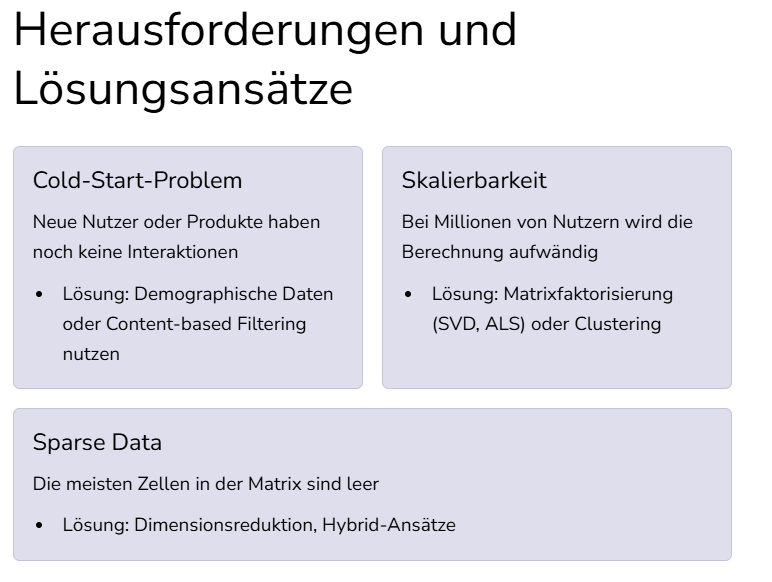